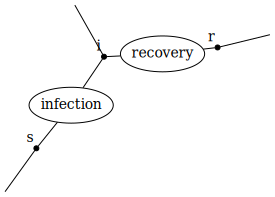

In [1]:
using AlgebraicPetri
using AlgebraicPetri.Epidemiology

using OrdinaryDiffEq
using LabelledArrays
using Plots

using Catlab.Theories
using Catlab.Graphics
using Catlab.CategoricalAlgebra
using Catlab.Programs.RelationalPrograms

display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));

sir = @relation (s, i, r) where (s, i, r) begin
    infection(s, i)
    recovery(i, r)
end
display_uwd(sir)

In [2]:
p_sir = apex(oapply_epi(sir));
Graph(p_sir)

u0 = LVector(S=990, I=10, R=0);
t_span = (17.0,120.0)

γ = 1/14
β = t->begin
    policy_days = [20,60,120] .+ 17
    contact_rate = 0.05
    pol = findfirst(x->t<=x, policy_days) # array of days when policy changes
    growth_rate = pol == 1 ? 0.0 : (2^(1/((pol-1)*5)) - 1) # growth rate depending on policy
    return (growth_rate + γ) / 990 * (1-contact_rate) # calculate rate of infection
end
p = LVector(inf=β, rec=γ);

prob = ODEProblem(vectorfield(p_sir),u0,t_span,p)
sol = OrdinaryDiffEq.solve(prob,Tsit5())
plot(sol)
png("ode-chime.png")

/home/runner/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
